In [89]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Obesity_data.csv", sep = ';')

Saving Obesity_data.csv to Obesity_data (2).csv


In [47]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III



This Data is a presentation of the estimation of Obesity levels in individuals drom countries of Mexico, Peru and Colombie, based on their eating habits and physical condition.
The Data Countains 17 attributes and 2111 records that are labled with the class variable NObesity (Obesity level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

The research quetion could be:

**How do eating habits and physical conditions predict obesity levels among individuals in Mexico, Peru, and Colombia ?**

**And can machine learning models be used to develop regional-specific dietary recommendations and physical activity guidelines to manage obesity?**

In [48]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


The dataset in question provides a comprehensive overview of various factors that could influence obesity levels in individuals from Mexico, Peru, and Colombia. It includes demographic data such as age and gender, biometric data like height and weight, and lifestyle factors including diet and exercise habits.

From an age perspective, the dataset encompasses a broad age range from adolescents to seniors, allowing for analysis across different life stages. The inclusion of height and weight allows for the calculation of Body Mass Index (BMI), a key indicator of obesity.

Dietary habits are captured through variables such as the frequency of vegetable consumption and the number of main meals, providing insight into the nutritional aspects of the participants' lifestyles. Water consumption data offers additional health-related insights, as adequate hydration is often associated with overall well-being and weight management.

Physical activity frequency is also recorded, giving an indication of the participants' engagement in exercise which is a crucial factor in obesity and health. The dataset even extends to technological engagement, with data on the time spent using technology devices, which may correlate with a sedentary lifestyle, a known risk factor for obesity.

The combination of these variables makes the dataset rich for analyzing the interplay between lifestyle, diet, exercise, and their collective impact on obesity. It could be instrumental in developing targeted interventions to combat obesity and promote healthy living within these populations.

In [49]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [50]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [90]:
# Renommage des colonnes
df = df.rename(columns={
    'FAVC': 'FreqCalFood',   # Frequently eating Caloric Food
    'FCVC': 'FreqVegFood',   # Frequently eating Vegetable Food
    'NCP': 'MealsDaily',     # Number of Meals per Day
    'CAEC': 'SnacksFreq',    # Eating Between Meals
    'CH2O': 'WaterDaily',    # Quantity of Water Drunk per day
    'SCC': 'CalCount',       # Monitoring Calorie Intake per day
    'FAF': 'PhysActFreq',    # Frequency of Physical Activities
    'CALC': 'AlcFreq'        # Drinking Alcohol
})
#df['TUE'] Time Using Electronics

Renaming columns can enhance the presentation of our graphs and improve our understanding of the meaning of each variable

In [52]:
# Premières informations
print("Premières lignes:\n\n", df.head(5), '\n\nDimensions:', df.shape, "\n\nColonnes:", df.columns)

Premières lignes:

    Gender   Age  Height  Weight family_history_with_overweight FreqCalFood  \
0  Female  21.0    1.62    64.0                            yes          no   
1  Female  21.0    1.52    56.0                            yes          no   
2    Male  23.0    1.80    77.0                            yes          no   
3    Male  27.0    1.80    87.0                             no          no   
4    Male  22.0    1.78    89.8                             no          no   

   FreqVegFood  MealsDaily SnacksFreq SMOKE  WaterDaily CalCount  PhysActFreq  \
0          2.0         3.0  Sometimes    no         2.0       no          0.0   
1          3.0         3.0  Sometimes   yes         3.0      yes          3.0   
2          2.0         3.0  Sometimes    no         2.0       no          2.0   
3          3.0         3.0  Sometimes    no         2.0       no          2.0   
4          2.0         1.0  Sometimes    no         2.0       no          0.0   

   TUE     AlcFreq      

In [53]:
# Informations plus approfondies
print(df.isna().sum(), '\n',df.dtypes)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FreqCalFood                       0
FreqVegFood                       0
MealsDaily                        0
SnacksFreq                        0
SMOKE                             0
WaterDaily                        0
CalCount                          0
PhysActFreq                       0
TUE                               0
AlcFreq                           0
MTRANS                            0
NObeyesdad                        0
dtype: int64 
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FreqCalFood                        object
FreqVegFood                       float64
MealsDaily                        float64
SnacksFreq                         ob

No missing data

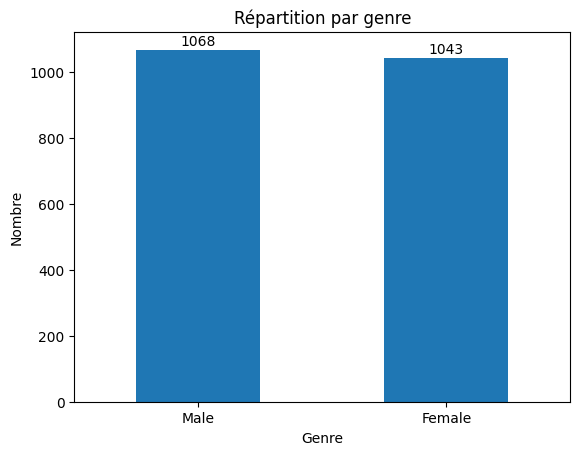

In [54]:
gender_counts = df['Gender'].value_counts()

ax = gender_counts.plot(kind='bar')
plt.title('Répartition par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.xticks(rotation=0)

# Etiquette :

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 5, str(i.get_height()), ha='center', va='bottom')

plt.show()

#Plus d'hommes

Our Data includes 1068 males and 1043 females. We aim to explore the differences in obesity estimation between the two genders.

In [55]:
print("Age moyen:", round(np.mean(df['Age']), 2) ,",  Poids moyen", round(np.mean(df['Weight']), 2) , "\nRépartition des classes en pourcentage:\n\n",round(df['NObeyesdad'].value_counts()/len(df), 2))

Age moyen: 24.31 ,  Poids moyen 86.59 
Répartition des classes en pourcentage:

 Obesity_Type_I         0.17
Obesity_Type_III       0.15
Obesity_Type_II        0.14
Overweight_Level_I     0.14
Overweight_Level_II    0.14
Normal_Weight          0.14
Insufficient_Weight    0.13
Name: NObeyesdad, dtype: float64


We can see that we have most young adult population with higher average weight, this can be due to a prevalence of overweight conditions.
We have a distrivution of obesity classes in a fairly uniform across various levels, from insufficient weight to serve obesity. This makes the data suitable for analyzing obesity-related trends and for creating models that predict obesity levels based on the available variables.


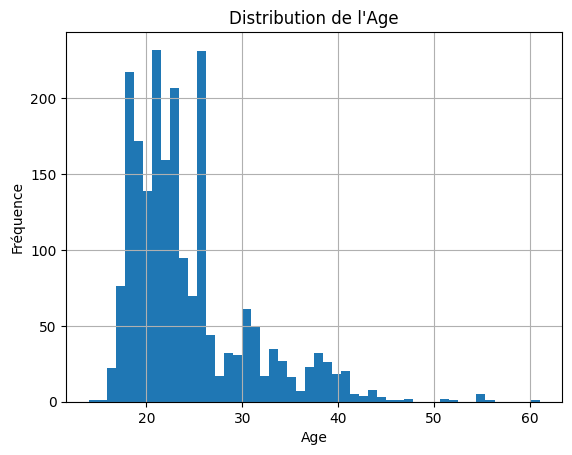

In [56]:
#Distribution d'âge :

df['Age'].hist(bins=50)
plt.title('Distribution de l\'Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()
#Montre que la data contient beaucoup plus de jeune

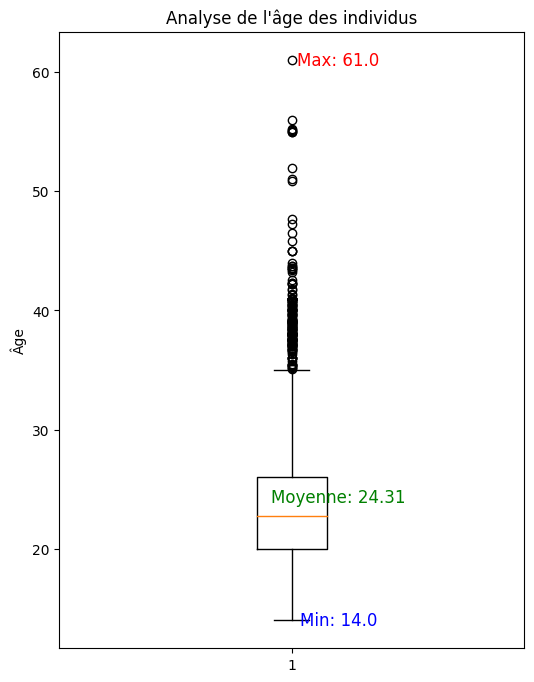

In [57]:
# Répartition de l'age des individus
ages = df['Age']
plt.figure(figsize=(6, 8))
plt.boxplot(ages, vert=True)
plt.ylabel('Âge')
plt.title('Analyse de l\'âge des individus')

min_age = min(ages)
max_age = max(ages)
mean_age = round(ages.mean(), 2)

# Position en x, position en y, texte, alignement verticale, alignement horizontale, couleur, taille de la police
plt.text(1.1, min_age, f'Min: {min_age}', va='center', ha='center', color='blue', fontsize=12)
plt.text(1.1, max_age, f'Max: {max_age}', va='center', ha='center', color='red', fontsize=12)
plt.text(1.1, mean_age, f'Moyenne: {mean_age}', va='center', ha='center', color='green', fontsize=12)

plt.show()

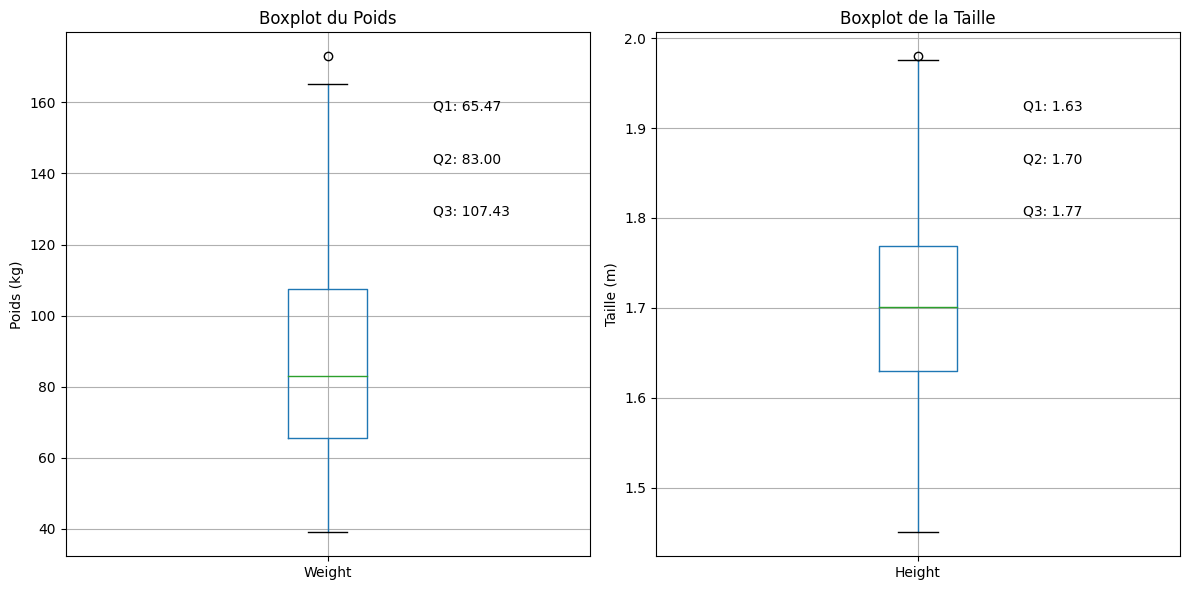

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot pour le poids
df.boxplot(column=['Weight'], ax=axes[0])
axes[0].set_title('Boxplot du Poids')
axes[0].set_ylabel('Poids (kg)')

# Boxplot pour la taille
df.boxplot(column=['Height'], ax=axes[1])
axes[1].set_title('Boxplot de la Taille')
axes[1].set_ylabel('Taille (m)')

# Calcul des quantiles pour le poids et la taille
quartiles_weight = df['Weight'].quantile([0.25, 0.5, 0.75])
quartiles_height = df['Height'].quantile([0.25, 0.5, 0.75])

# Ajout des quantiles comme texte sur les boxplots
axes[0].text(0.7, 0.85, f'Q1: {quartiles_weight.iloc[0]:.2f}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.75, f'Q2: {quartiles_weight.iloc[1]:.2f}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.65, f'Q3: {quartiles_weight.iloc[2]:.2f}', transform=axes[0].transAxes)

axes[1].text(0.7, 0.85, f'Q1: {quartiles_height.iloc[0]:.2f}', transform=axes[1].transAxes)
axes[1].text(0.7, 0.75, f'Q2: {quartiles_height.iloc[1]:.2f}', transform=axes[1].transAxes)
axes[1].text(0.7, 0.65, f'Q3: {quartiles_height.iloc[2]:.2f}', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


In [91]:
# Création variable IMC
df['IMC'] = df['Weight'] / (df['Height'] ** 2)
#columns_to_drop = ['Height', 'Weight']
#df = df.drop(columns=columns_to_drop)

In [60]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FreqCalFood,FreqVegFood,MealsDaily,SnacksFreq,SMOKE,WaterDaily,CalCount,PhysActFreq,TUE,AlcFreq,MTRANS,NObeyesdad,IMC
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


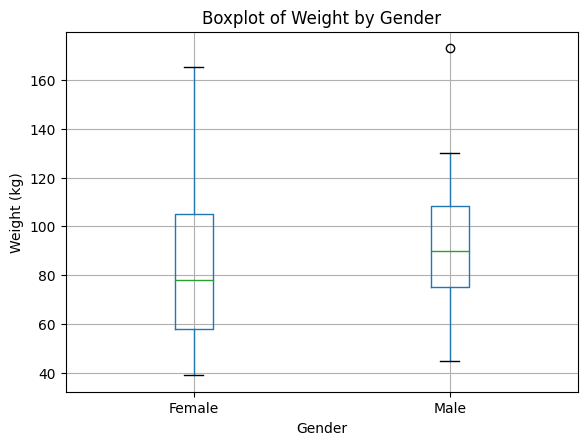

In [61]:
# Creating a boxplot for the weight by gender
df.boxplot(column=['Weight'], by='Gender')
plt.title('Boxplot of Weight by Gender')
plt.suptitle('')
plt.ylabel('Weight (kg)')
plt.xlabel('Gender')
plt.show()

In [62]:
#Vérification :
max_weight_by_gender = df.groupby('Gender')['Weight'].max()
max_weight_by_gender

Gender
Female    165.057269
Male      173.000000
Name: Weight, dtype: float64

In [63]:
second_max_weight_by_gender = df.groupby('Gender')['Weight'].apply(lambda x: x.sort_values(ascending=False).iloc[1])

second_max_weight_by_gender

Gender
Female    160.935351
Male      130.000000
Name: Weight, dtype: float64

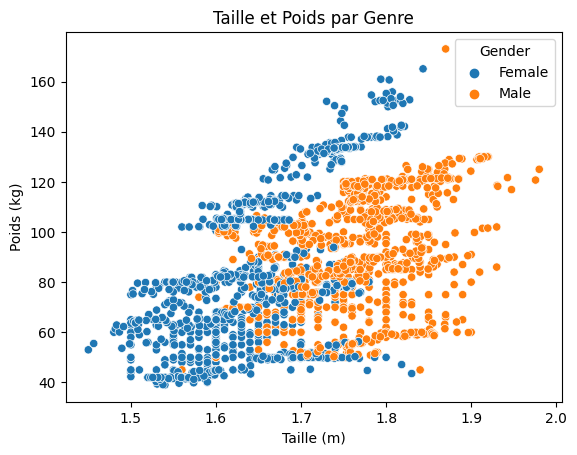

In [64]:
#Correlation :
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')
plt.title('Taille et Poids par Genre')
plt.xlabel('Taille (m)')
plt.ylabel('Poids (kg)')
plt.show()


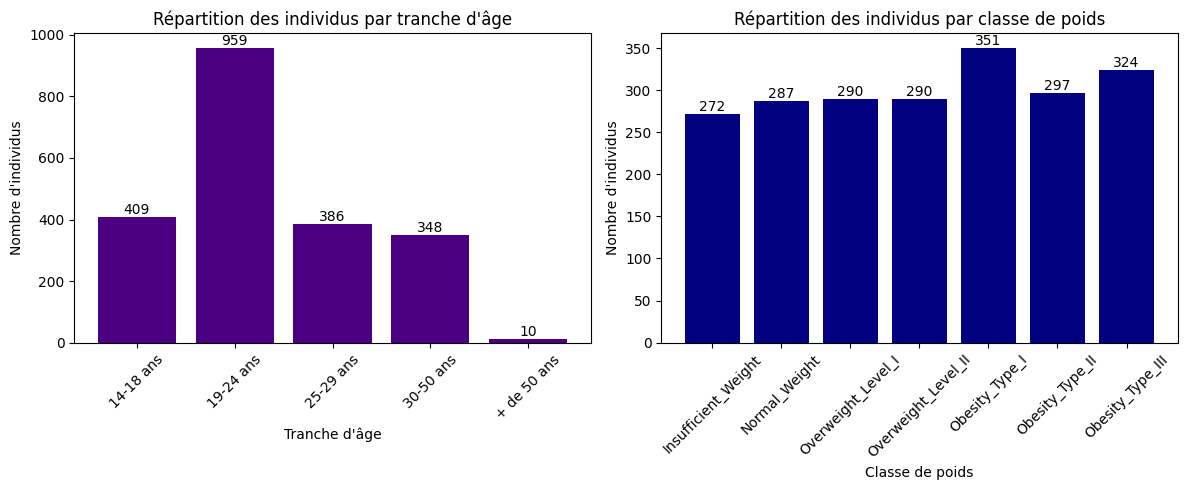

In [65]:
# Quelques visualisations

ordre_categories = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

limites_age = [14, 19, 25, 30, 51]
tranches_age = pd.cut(df['Age'], bins=limites_age, labels=['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans'])
nombres_par_tranche = tranches_age.value_counts().sort_index()
nombres_par_tranche['+ de 50 ans'] = len(df[df['Age'] > 50])
nombres_par_classe_poids = df['NObeyesdad'].value_counts().loc[ordre_categories]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(nombres_par_tranche.index, nombres_par_tranche, color='indigo')
ax1.set_xlabel('Tranche d\'âge')
ax1.set_ylabel('Nombre d\'individus')
ax1.set_title('Répartition des individus par tranche d\'âge')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(nombres_par_tranche):
    ax1.text(i, v, str(v), ha='center', va='bottom')

ax2.bar(nombres_par_classe_poids.index, nombres_par_classe_poids, color='navy')
ax2.set_xlabel('Classe de poids')
ax2.set_ylabel('Nombre d\'individus')
ax2.set_title('Répartition des individus par classe de poids')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(nombres_par_classe_poids):
    ax2.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [66]:
np.unique(df['NObeyesdad'])

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [67]:
!pip install dash

In [92]:
## Nb de personnes par tranches d'âge, en fonction du type d'obésité par distinction du genre

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

df2 = df.copy()
# Définir les limites d'âge pour la création des tranches d'âge
limites_age = [14, 19, 25, 30, 51]
tranches_age = pd.cut(df2['Age'], bins=limites_age + [df2['Age'].max() + 1], labels=['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans', '50+'])

# Ajouter une colonne 'tranches_age' à votre dataframe
df2['tranches_age'] = tranches_age

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer le graphique interactif avec Plotly Express
fig = px.bar(df2, x='tranches_age', color='NObeyesdad', title="Nombre de personnes par tranche d'âge et genre",
             labels={'count': 'Nombre de personnes', 'tranches_age': 'Tranches d\'âge'},
             category_orders={'tranches_age': ['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans', '50+']},
             color_discrete_map={'Male': 'darkturquoise', 'Female': 'salmon'},
             width=800, height=400)

# Créer la mise en page Dash avec un sélecteur
app.layout = html.Div([
    dcc.Dropdown(
        id='obesity-selector',
        options=[{'label': i, 'value': i} for i in df2['NObeyesdad'].unique()],
        value=df['NObeyesdad'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(
        id='age-obesity-plot',
        figure=fig
    )
])

# Définir le callback pour mettre à jour le graphique en fonction du sélecteur
@app.callback(
    Output('age-obesity-plot', 'figure'),
    [Input('obesity-selector', 'value')]
)
def update_plot(selected_obesity):
    selected_data = df2[df2['NObeyesdad'] == selected_obesity]
    fig = px.bar(selected_data, x='tranches_age', color='Gender', title=f"Nombre de personnes par tranche d'âge et genre pour {selected_obesity}",
                 labels={'count': 'Nombre de personnes', 'tranches_age': 'Tranches d\'âge'},
                 category_orders={'tranches_age': ['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans', '50+']},
                 color_discrete_map={'Male': 'darkturquoise', 'Female': 'salmon'},
                 width=800, height=400)
    return fig

# Lancer l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [94]:
## Nb de personnes en fonction de l'activité physique, par catégorie de corpulence

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd


df2['Activite_Physique'] = df2['MTRANS'].apply(lambda x: 'Activité physique' if x in ['Bike', 'Walking'] else 'Activité non physique')

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer la mise en page Dash avec un sélecteur
app.layout = html.Div([
    dcc.Dropdown(
        id='activity-selector',
        options=[{'label': i, 'value': i} for i in df2['Activite_Physique'].unique()],
        value=df2['Activite_Physique'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(
        id='age-obesity-plot',
    )
])

# Définir le callback pour mettre à jour le graphique en fonction du sélecteur
@app.callback(
    Output('age-obesity-plot', 'figure'),
    [Input('activity-selector', 'value')]
)
def update_plot(selected_activity):
    selected_data = df2[df2['Activite_Physique'] == selected_activity]

    fig = go.Figure()

    for age_group in ['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans', '50+']:
        age_group_data = selected_data[selected_data['tranches_age'] == age_group]
        counts = age_group_data['NObeyesdad'].value_counts()

        fig.add_trace(go.Bar(
            x=counts.index,
            y=counts.values,
            name=age_group,
        ))

    fig.update_layout(
        barmode='stack',  # Utilisez 'stack' pour empiler les barres
        title=f"Nombre de personnes par type d'obésité et tranche d'âge pour {selected_activity}",
        xaxis_title="Catégorie de poids",
        yaxis_title="Nombre de personnes",
        width=800,
        height=400,
        xaxis={'categoryorder': 'array', 'categoryarray': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
    )

    return fig

# Lancer l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [97]:
## Nb de personnes en fonction de l'activité physique et du genre, par catégorie de corpulence

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer la mise en page Dash avec des sélecteurs
app.layout = html.Div([
    dcc.Dropdown(
        id='activity-selector',
        options=[{'label': i, 'value': i} for i in df2['Activite_Physique'].unique()],
        value=df2['Activite_Physique'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Dropdown(
        id='gender-selector',
        options=[{'label': i, 'value': i} for i in df2['Gender'].unique()],
        value=df2['Gender'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(
        id='age-obesity-plot',
    )
])

# Définir le callback pour mettre à jour le graphique en fonction des sélecteurs
@app.callback(
    Output('age-obesity-plot', 'figure'),
    [Input('activity-selector', 'value'),
     Input('gender-selector', 'value')]
)
def update_plot(selected_activity, selected_gender):
    selected_data = df2[(df2['Activite_Physique'] == selected_activity) & (df2['Gender'] == selected_gender)]

    fig = go.Figure()

    for age_group in ['14-18 ans', '19-24 ans', '25-29 ans', '30-50 ans', '50+']:
        age_group_data = selected_data[selected_data['tranches_age'] == age_group]
        counts = age_group_data['NObeyesdad'].value_counts()

        fig.add_trace(go.Bar(
            x=counts.index,
            y=counts.values,
            name=age_group,
        ))

    fig.update_layout(
        barmode='stack',  # Utilisez 'stack' pour empiler les barres
        title=f"Nombre de personnes par type d'obésité et tranche d'âge pour {selected_activity} ({selected_gender})",
        xaxis_title="Catégorie de poids",
        yaxis_title="Nombre de personnes",
        width=800,
        height=400,
        xaxis={'categoryorder': 'array', 'categoryarray': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
    )

    return fig

# Lancer l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

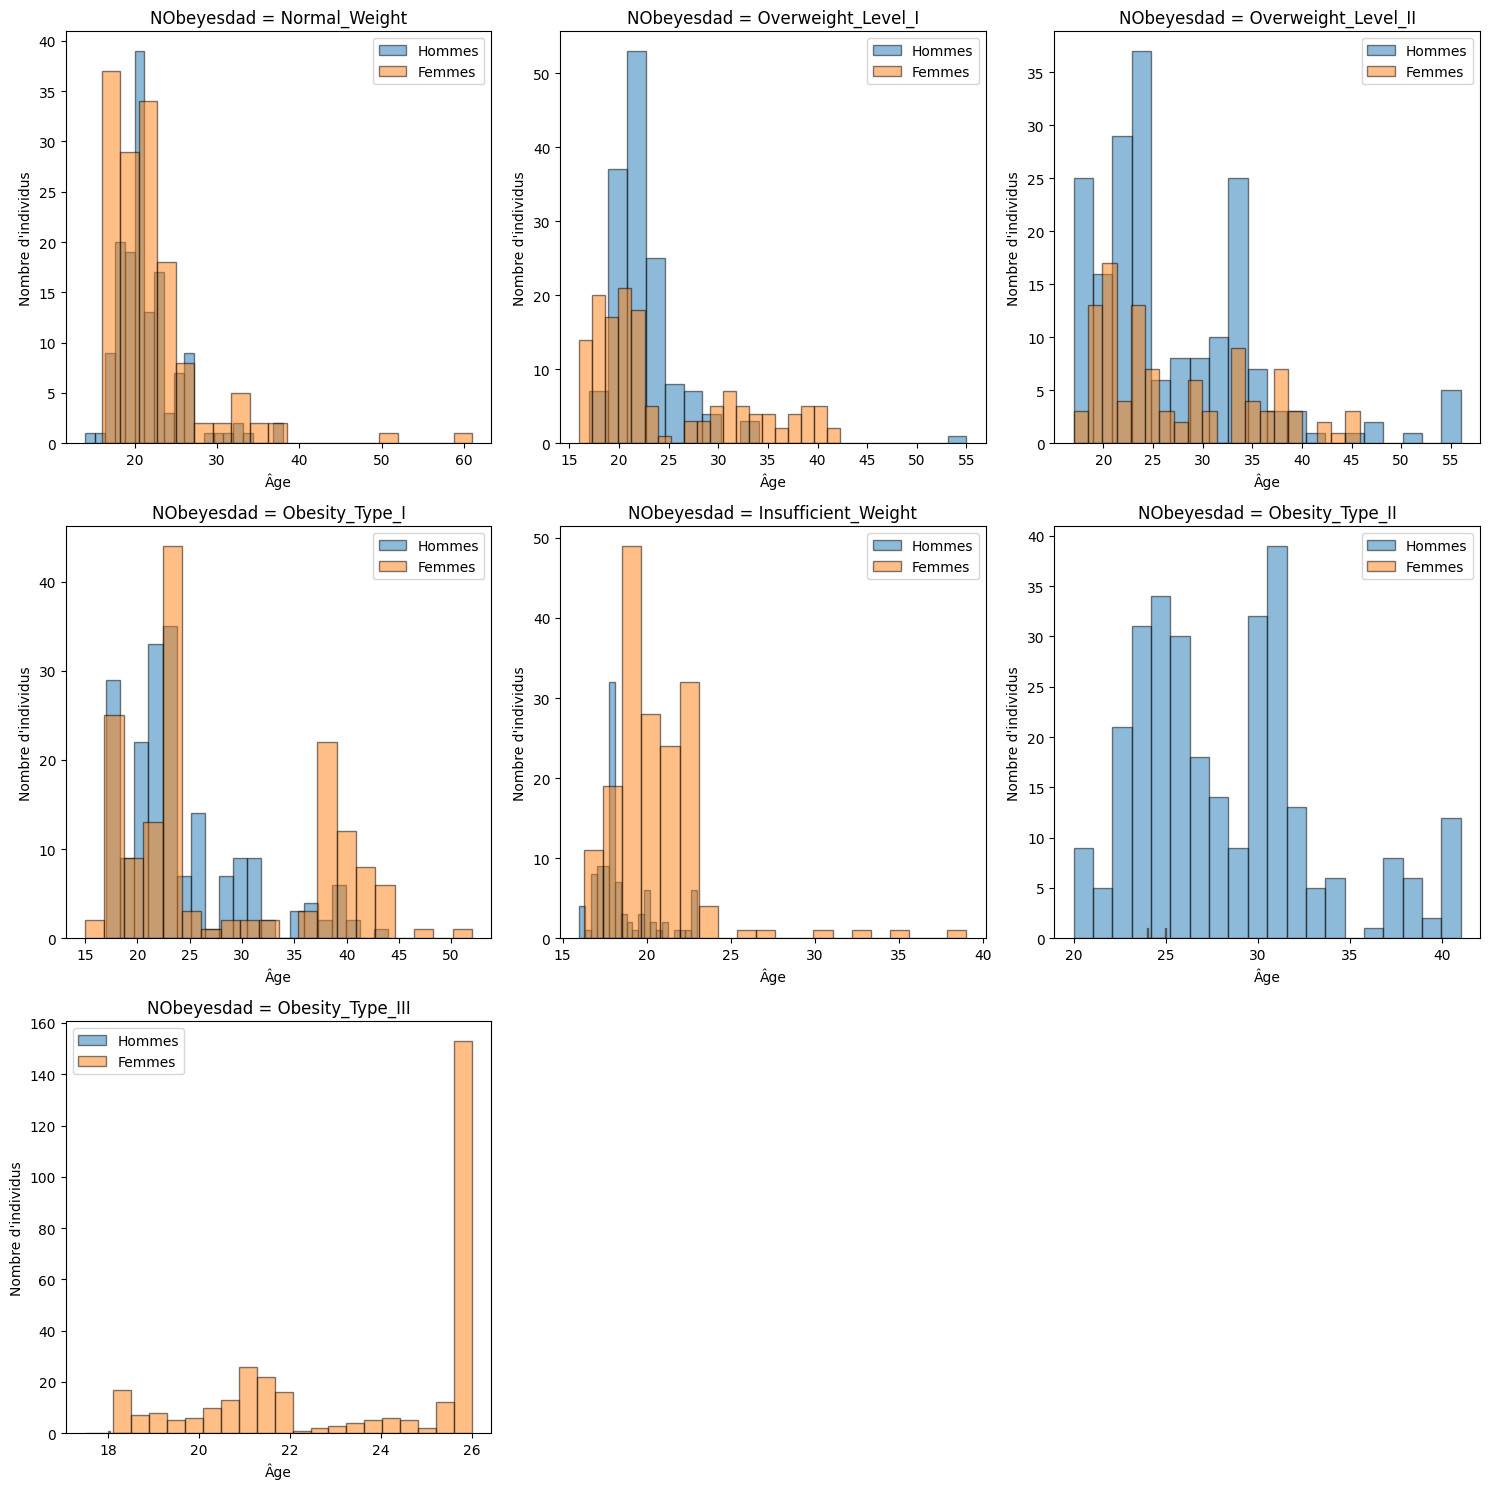

In [98]:
unique_values = df['NObeyesdad'].unique()
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, value in enumerate(unique_values):
    row = i // num_cols
    col = i % num_cols

    subset = df[df['NObeyesdad'] == value]
    male_subset = subset[subset['Gender'] == 'Male']['Age']
    female_subset = subset[subset['Gender'] == 'Female']['Age']
    axes[row, col].hist(male_subset, bins=20, edgecolor='k', alpha=0.5, label='Hommes')
    axes[row, col].hist(female_subset, bins=20, edgecolor='k', alpha=0.5, label='Femmes')
    axes[row, col].set_xlabel('Âge')
    axes[row, col].set_ylabel('Nombre d\'individus')
    axes[row, col].set_title(f'NObeyesdad = {value}')
    axes[row, col].legend()

for i in range(len(unique_values), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [101]:
# A partir de là, les variables taille et poids ne sont plus utiles car nous tiendrons compte de l'IMC
columns_to_drop = ['Height', 'Weight']
df = df.drop(columns=columns_to_drop)

In [99]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FreqCalFood,FreqVegFood,MealsDaily,SnacksFreq,SMOKE,WaterDaily,CalCount,PhysActFreq,TUE,AlcFreq,MTRANS,NObeyesdad,IMC
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


# Encoding :

In [104]:
df

,Gender,Age,family_history_with_overweight,FreqCalFood,FreqVegFood,MealsDaily,SnacksFreq,SMOKE,WaterDaily,CalCount,PhysActFreq,TUE,AlcFreq,MTRANS,NObeyesdad,IMC
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [106]:
from sklearn.preprocessing import OrdinalEncoder
nominal_columns = ['Gender', 'family_history_with_overweight', 'FreqCalFood', 'SMOKE', 'CalCount', 'MTRANS']
ordinal_columns = ['SnacksFreq', 'AlcFreq', 'NObeyesdad']

# Encodage One-Hot pour les variables nominales
onehot_encoder = OneHotEncoder(sparse=False)
nominal_data_encoded = onehot_encoder.fit_transform(df[nominal_columns])
nominal_encoded_df = pd.DataFrame(nominal_data_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))

# Encodage ordinal pour les variables ordinales
ordinal_encoder = OrdinalEncoder()
ordinal_data_encoded = ordinal_encoder.fit_transform(df[ordinal_columns])
ordinal_encoded_df = pd.DataFrame(ordinal_data_encoded, columns=[col + '_encoded' for col in ordinal_columns])

data_encoded = df.drop(nominal_columns + ordinal_columns, axis=1)
data_encoded = pd.concat([data_encoded, nominal_encoded_df, ordinal_encoded_df], axis=1)

data_encoded["WaterDaily"] = round(data_encoded["WaterDaily"])
data_encoded["PhysActFreq"] = round(data_encoded["PhysActFreq"])
data_encoded["TUE"] = round(data_encoded["TUE"])

data_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,Age,FreqVegFood,MealsDaily,WaterDaily,PhysActFreq,TUE,IMC,Gender_Female,Gender_Male,family_history_with_overweight_no,...,CalCount_no,CalCount_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SnacksFreq_encoded,AlcFreq_encoded,NObeyesdad_encoded
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,6.0


L'importation de cette data va nous permettre de voir mieux les données

In [107]:
# Calcule de la matrice de corrélation pour le dataframe
correlation_matrix = data_encoded.corr()
correlation_matrix['NObeyesdad_encoded'].abs().sort_values(ascending=False)

NObeyesdad_encoded                    1.000000
IMC                                   0.429686
SnacksFreq_encoded                    0.327295
family_history_with_overweight_no     0.313667
family_history_with_overweight_yes    0.313667
Age                                   0.236170
AlcFreq_encoded                       0.134632
PhysActFreq                           0.120710
WaterDaily                            0.108420
MealsDaily                            0.092616
MTRANS_Walking                        0.073823
TUE                                   0.059050
CalCount_no                           0.050679
CalCount_yes                          0.050679
FreqCalFood_yes                       0.044582
FreqCalFood_no                        0.044582
MTRANS_Automobile                     0.041170
MTRANS_Motorbike                      0.034293
Gender_Male                           0.024908
Gender_Female                         0.024908
SMOKE_no                              0.023256
SMOKE_yes    

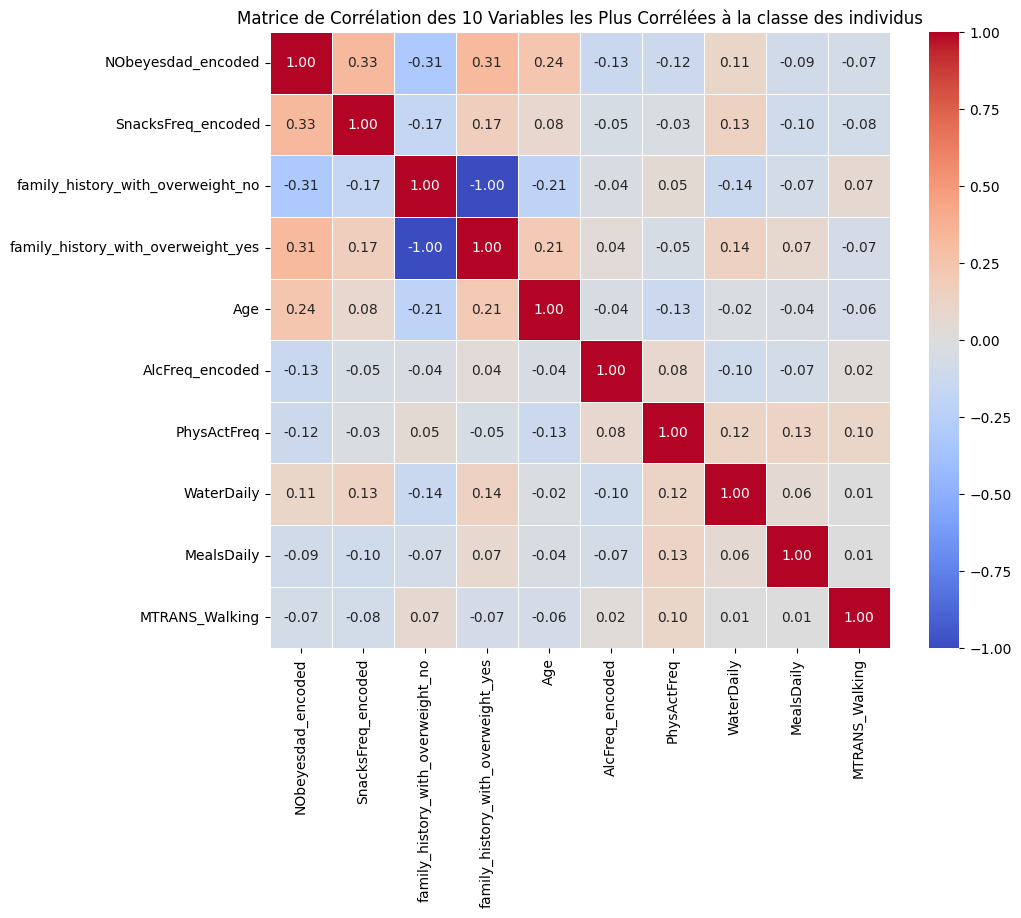

In [122]:
correlation_matrix = data_encoded.corr()
sorted_correlation = correlation_matrix['NObeyesdad_encoded'].abs().sort_values(ascending=False)
top_correlations = sorted_correlation.head(10)
subset_corr_matrix = correlation_matrix.loc[top_correlations.index, top_correlations.index]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation des 10 Variables les Plus Corrélées à la classe des individus")
plt.show()

### IMC (Indice de Masse Corporelle)
L'IMC montre une corrélation positive substantielle avec l'insuffisance pondérale et tous les autres types d'obésité, ce qui est logique puisque l'IMC est directement dérivé du poids et de la taille d'un individu. Un IMC faible est caractéristique d'un poids insuffisant, tandis qu'un IMC élevé indique souvent l'obésité. Cette mesure s'avère être un indicateur fiable de la corpulence générale et des risques de santé associés.

### Family History of Overweight (Antécédents familiaux de surpoids)
Les antécédents familiaux d'obésité présentent une corrélation significative avec tous les états de poids, ce qui suggère que les facteurs héréditaires et les comportements familiaux en matière de santé et d'alimentation jouent un rôle crucial dans le poids d'un individu. Cela implique l'importance de considérer l'histoire familiale lors de l'évaluation des risques de poids insuffisant ou d'obésité.

### MealsDaily (Nombre de repas quotidiens)
Le nombre de repas quotidiens a une corrélation modeste avec l'insuffisance pondérale et certains types d'obésité. Cela pourrait refléter l'impact de la fréquence des repas sur le métabolisme et le contrôle du poids. Des repas réguliers et équilibrés peuvent aider à maintenir un poids sain, tandis que des habitudes alimentaires irrégulières peuvent contribuer à l'obésité ou à l'insuffisance pondérale.

### PhysActFreq (Fréquence de l'activité physique)
La corrélation entre la fréquence de l'activité physique et les différents états de poids est généralement modeste, mais reste importante. Cela indique que l'activité physique régulière est un élément clé dans la prévention de l'obésité et peut être bénéfique pour atteindre ou maintenir un poids normal.

### WaterDaily (Consommation quotidienne d'eau)
La consommation quotidienne d'eau montre une corrélation légère avec les états pondéraux, ce qui suggère que bien qu'importante pour la santé globale, la quantité d'eau consommée n'est pas un facteur déterminant du poids corporel. Cependant, elle peut jouer un rôle dans la régulation de l'appétit et du métabolisme.

### FreqVegFood (Fréquence de consommation de légumes)
La fréquence de consommation de légumes a une corrélation variable avec les différents états pondéraux. Bien que généralement faible, elle est plus prononcée pour l'obésité de type III. Cela pourrait refléter l'impact positif d'une alimentation riche en légumes sur le maintien d'un poids sain et la prévention de l'obésité extrême.

### Gender (Genre)
Une corrélation remarquable entre le genre et l'obésité de type II est observée, indiquant des différences potentiellement importantes dans la prévalence ou la manifestation de ce type d'obésité entre les sexes. Cela pourrait être dû à des différences biologiques ou à des comportements liés au genre en matière de santé et d'alimentation.


Question : Why is it more related to the gender ?

In [76]:
# On constate que l'IMC et le facteur héréditaire sont très largement en corrélation avec l'obésitée déclarée chez un patient
# Et le Family History

In [77]:
df

,Gender,Age,family_history_with_overweight,FreqCalFood,FreqVegFood,MealsDaily,SnacksFreq,SMOKE,WaterDaily,CalCount,PhysActFreq,TUE,AlcFreq,MTRANS,NObeyesdad,IMC,Activite_Physique
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526,Activité non physique
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227,Activité non physique
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432,Activité non physique
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852,Activité physique
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Activité non physique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475,Activité non physique
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923,Activité non physique
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817,Activité non physique
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535,Activité non physique


In [108]:
# Modèles Machine Learning

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X = data_encoded.drop('NObeyesdad_encoded', axis=1)
y = data_encoded['NObeyesdad_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
category_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Accuracy:  0.97
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.95      0.97        56
      Normal_Weight       0.93      1.00      0.96        62
 Overweight_Level_I       0.99      0.95      0.97        78
Overweight_Level_II       0.95      0.98      0.97        58
     Obesity_Type_I       0.98      1.00      0.99        63
    Obesity_Type_II       0.98      0.91      0.94        56
   Obesity_Type_III       0.94      0.98      0.96        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



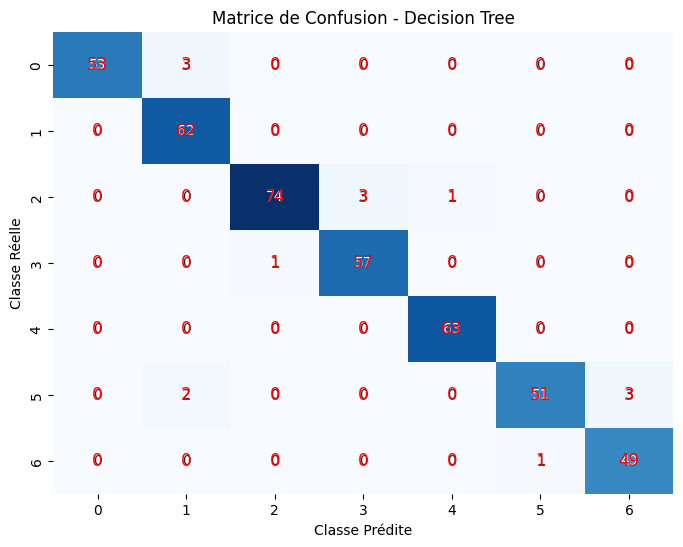

In [109]:
# Décision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred, target_names=category_names)
accuracy_Dt = accuracy_score(y_test, y_pred)

print('Accuracy: ', round(accuracy_Dt, 2))
print(report)

y_pred_dt = decision_tree.predict(X_test)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_mat_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
for i in range(len(category_names)):
    for j in range(len(category_names)):
        plt.text(j + 0.5, i + 0.5, confusion_mat_dt[i, j], ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion - Decision Tree')

plt.show()

Accuracy:  0.96
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        56
      Normal_Weight       0.91      0.95      0.93        62
 Overweight_Level_I       0.99      0.97      0.98        78
Overweight_Level_II       0.97      0.98      0.97        58
     Obesity_Type_I       1.00      1.00      1.00        63
    Obesity_Type_II       0.92      0.88      0.90        56
   Obesity_Type_III       0.96      0.96      0.96        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



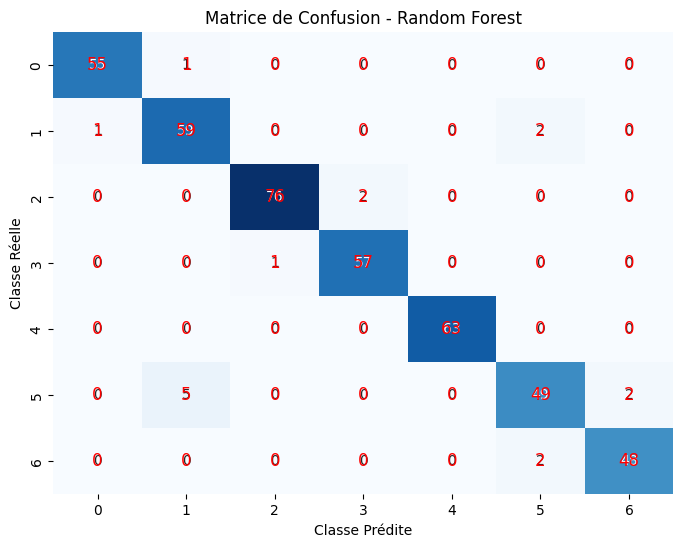

In [110]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=category_names)
accuracy_rf = accuracy_score(y_test, y_pred)

print('Accuracy: ', round(accuracy_rf, 2))
print(report)

y_pred_rf = rf_model.predict(X_test)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

for i in range(len(category_names)):
    for j in range(len(category_names)):
        plt.text(j + 0.5, i + 0.5, confusion_mat_rf[i, j], ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion - Random Forest')

plt.show()

Accuracy:  0.97
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.97      0.94      0.95        62
 Overweight_Level_I       0.97      0.97      0.97        78
Overweight_Level_II       0.97      1.00      0.98        58
     Obesity_Type_I       1.00      1.00      1.00        63
    Obesity_Type_II       0.95      0.95      0.95        56
   Obesity_Type_III       0.94      0.96      0.95        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



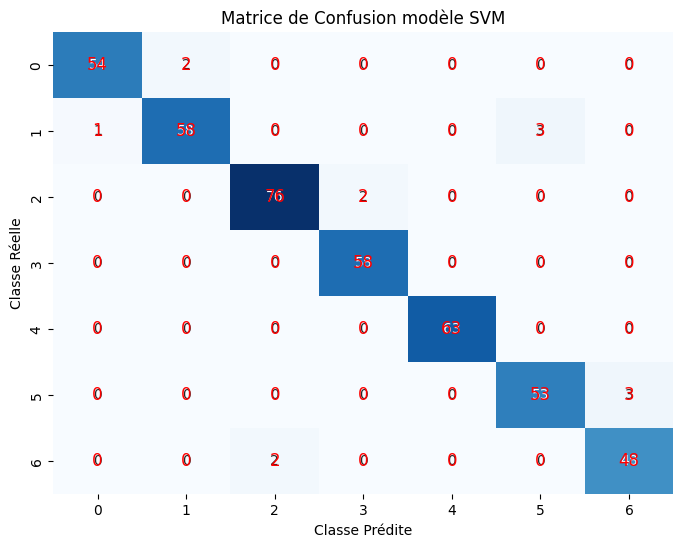

In [111]:
# SVM

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=category_names)

print('Accuracy: ', round(accuracy_svm, 2))
print(report)

y_pred = svm_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

for i in range(len(category_names)):
    for j in range(len(category_names)):
        plt.text(j + 0.5, i + 0.5, confusion_mat[i, j], ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion modèle SVM')

plt.show()

Création d'un outil de proposition de nouvelles habitudes pour réajuster la classe d'un individu

In [112]:
# Suppression de l'IMC pour ne pas biaiser notre essai
X = data_encoded.drop('NObeyesdad_encoded', axis=1)
X = X.drop('IMC', axis=1)
y = data_encoded['NObeyesdad_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
category_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [113]:
# SVM

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=category_names)

print('Accuracy: ', round(accuracy_svm, 2))
print(report)

Accuracy:  0.65
                     precision    recall  f1-score   support

Insufficient_Weight       0.60      0.79      0.68        56
      Normal_Weight       0.56      0.35      0.44        62
 Overweight_Level_I       0.55      0.72      0.62        78
Overweight_Level_II       0.73      0.83      0.77        58
     Obesity_Type_I       0.97      1.00      0.98        63
    Obesity_Type_II       0.55      0.48      0.51        56
   Obesity_Type_III       0.55      0.32      0.41        50

           accuracy                           0.65       423
          macro avg       0.65      0.64      0.63       423
       weighted avg       0.65      0.65      0.64       423



In [114]:
data_encoded = data_encoded.drop('IMC', axis=1)

In [119]:
individu_selectionne = data_encoded[(data_encoded['NObeyesdad_encoded'] == 5.0) & (data_encoded['Gender_Female'] == 1) & (data_encoded['Gender_Male'] == 0)].iloc[3]
variables = [col for col in data_encoded.columns if col != 'NObeyesdad_encoded']

variables_non_modifiables = ["Age", "Gender_Female", "Gender_Male", "family_history_with_overweight_no", "family_history_with_overweight_yes", "IMC"]
variables_modifiables = [variable for variable in variables if variable not in variables_non_modifiables]

donnees_filtrees = data_encoded[(data_encoded['NObeyesdad_encoded'] >= 4.0) & (data_encoded['NObeyesdad_encoded'] <= 4.0)]
age_max = individu_selectionne['Age'] + 2
donnees_age_similaire = donnees_filtrees[(donnees_filtrees['Age'] >= individu_selectionne['Age'] - 2) & (donnees_filtrees['Age'] <= age_max)]

donnees_similaires = donnees_age_similaire[(donnees_age_similaire['Gender_Female'] == 1) &
                                            (donnees_age_similaire['Gender_Male'] == 0) &
                                            (donnees_age_similaire['family_history_with_overweight_no'] == individu_selectionne['family_history_with_overweight_no']) &
                                            (donnees_age_similaire['family_history_with_overweight_yes'] == individu_selectionne['family_history_with_overweight_yes'])]
donnees_similaires['FreqVegFood'] = round(donnees_similaires['FreqVegFood'])
donnees_similaires['MealsDaily'] = round(donnees_similaires['MealsDaily'])
donnees_similaires['WaterDaily'] = round(donnees_similaires['WaterDaily'])
if not donnees_similaires.empty:
    valeur_plus_frequente = donnees_similaires[variable].mode().iloc[0]
    individu_ajuste[variable] = valeur_plus_frequente
    modification_apportee = individu_ajuste[variable]
    print(f"{variable}: {valeur_initiale} -> {modification_apportee}")
else:
    print(f"Aucune donnée similaire trouvée pour la variable {variable}")
individu_ajuste = individu_selectionne.copy()

for variable in variables_modifiables:
    valeur_initiale = individu_selectionne[variable]
    valeur_plus_frequente = donnees_similaires[variable].mode().iloc[0]
    individu_ajuste[variable] = valeur_plus_frequente
    modification_apportee = individu_ajuste[variable]
    print(f"{variable}: {valeur_initiale} -> {modification_apportee}")

caracteristiques_individu_ajuste = individu_ajuste[variables].values.reshape(1, -1)

classe_predite = svm_model.predict(caracteristiques_individu_ajuste)

print("Classe d'obésité prédite pour l'individu ajusté :", classe_predite)


NObeyesdad_encoded: 5.0 -> 4.0
FreqVegFood: 2.0 -> 3.0
MealsDaily: 3.0 -> 3.0
WaterDaily: 2.0 -> 2.0
PhysActFreq: 0.0 -> 1.0
TUE: 2.0 -> 1.0
FreqCalFood_no: 0.0 -> 0.0
FreqCalFood_yes: 1.0 -> 1.0
SMOKE_no: 0.0 -> 1.0
SMOKE_yes: 1.0 -> 0.0
CalCount_no: 1.0 -> 1.0
CalCount_yes: 0.0 -> 0.0
MTRANS_Automobile: 0.0 -> 0.0
MTRANS_Bike: 0.0 -> 0.0
MTRANS_Motorbike: 0.0 -> 0.0
MTRANS_Public_Transportation: 0.0 -> 1.0
MTRANS_Walking: 1.0 -> 0.0
SnacksFreq_encoded: 1.0 -> 2.0
AlcFreq_encoded: 3.0 -> 2.0
Classe d'obésité prédite pour l'individu ajusté : [4.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [120]:
for variable in variables_modifiables:
    valeur_initiale = individu_selectionne[variable]
    valeur_plus_frequente = donnees_similaires[variable].mode().iloc[0]
    individu_ajuste[variable] = valeur_plus_frequente
    modification_apportee = individu_ajuste[variable]
    if valeur_initiale != modification_apportee:
        print(f"{variable}: {valeur_initiale} -> {modification_apportee}")

FreqVegFood: 2.0 -> 3.0
PhysActFreq: 0.0 -> 1.0
TUE: 2.0 -> 1.0
SMOKE_no: 0.0 -> 1.0
SMOKE_yes: 1.0 -> 0.0
MTRANS_Public_Transportation: 0.0 -> 1.0
MTRANS_Walking: 1.0 -> 0.0
SnacksFreq_encoded: 1.0 -> 2.0
AlcFreq_encoded: 3.0 -> 2.0


En apportant ces modifications au patient, son état pourrait s'améliorer en passant à la classe infèrieure concernant son type d'obésité.
